In [64]:
import pandas as pd 
import numpy as np 
import RNA
import os 
import multiprocessing as mp 
import matplotlib.pyplot as plt 

In [19]:
def mutateOne(seq): 
    nucleotides = ["A", "C", "G" , "U"]
    mutate_pos = np.random.randint(low=0, high=len(seq))
    RNA_seq = list(seq)
    RNA_seq[mutate_pos] = np.random.choice(nucleotides, 1)[0]
    return "".join(RNA_seq)


In [76]:
def compute_relative_degree(sequence, nb_mutant=200) :
    
    target = RNA.fold(sequence)[0] 
    
    mutants = [ mutateOne(sequence) for i in range(nb_mutant)]
    strs = [RNA.fold(mutant)[0] for mutant in mutants]
    
    return strs.count(target)/(3.*len(sequence))
    

In [77]:
compute_relative_degree("AAAAAAGGCGGCAGAGCGGGGGAAAAAAAAAAAAAAAAAACGGGAAAAGGGAAACCAGAAGGAAACUAAAGAAGAUCAGAAGACGGCCGCCUUAGGA")

0.49140893470790376

In [63]:
mean_degrees = []
for i in range(len(os.listdir("F/0/"))) : 
    df = pd.read_csv("F/0/gen"+str(i)+".csv")
    pop = list(df['RNA_sequence'])[:10]
    degrees = map(compute_relative_degree, pop)
    mean_degrees.append(np.mean(degrees))


In [95]:
df = pd.read_csv("net_craw/0/genbest.csv")
pop = list(df['RNA_sequence'])
degrees = map(compute_relative_degree, pop)
mean_degrees.append(np.mean(degrees))

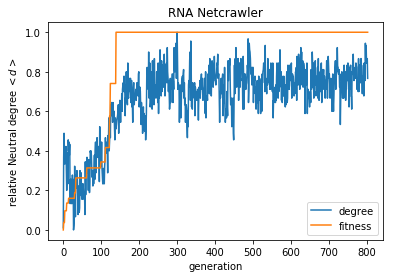

In [108]:
pop_str = np.array(pop_str)
degrees = np.array(degrees)

plt.plot((degrees-min(degrees))/(max(degrees)-min(degrees)), label='degree')
plt.plot((pop_str-min(pop_str))/(max(pop_str)-min(pop_str)), label="fitness")
plt.xlabel('generation')
plt.ylabel(r'relative Neutral degree $<d>$')
plt.title(r"RNA Netcrawler")
plt.legend()
plt.savefig("relative_degree.pdf")
plt.show()

In [81]:
target = "....((((((((....((..(...................)..((...((....))...((....))........))......))))))))))...."

In [82]:
def fitness (target,structure) : 
        return 1./(1+RNA.hamming_distance(target, structure))

In [112]:
pop_str = [] 
for ind in pop : 
    pop_str.append(fitness(target,RNA.fold(ind)[0]))


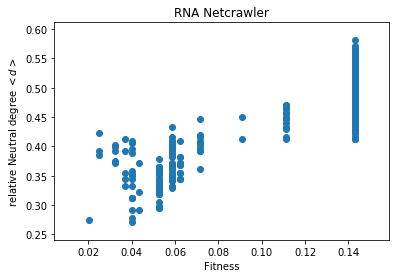

In [103]:
plt.scatter(pop_str, degrees)
plt.xlabel('Fitness')
plt.ylabel(r'relative Neutral degree $<d>$')
plt.title(r"RNA Netcrawler")
plt.savefig("relative_degree_fitness.pdf")
plt.show()

In [111]:
df = pd.read_csv("net_craw/1/genbest.csv")
pop = list(df['RNA_sequence'])[:2000]
degrees = map(compute_relative_degree, pop)
mean_degrees.append(np.mean(degrees))

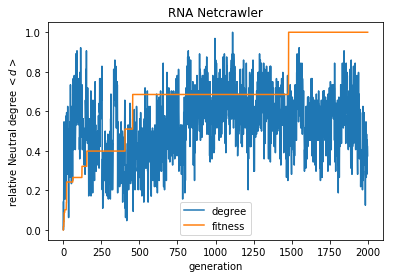

In [114]:
pop_str = np.array(pop_str)
degrees = np.array(degrees)

plt.plot((degrees-min(degrees))/(max(degrees)-min(degrees)), label='degree')
plt.plot((pop_str-min(pop_str))/(max(pop_str)-min(pop_str)), label="fitness")
plt.xlabel('generation')
plt.ylabel(r'relative Neutral degree $<d>$')
plt.title(r"RNA Netcrawler")
plt.legend()
#plt.savefig("relative_degree.pdf")
plt.show()